# LDA

### Referencias

- [Twitter Topic Modeling](https://towardsdatascience.com/twitter-topic-modeling-e0e3315b12e2)
- [Topic Modeling with Gensim (Python)](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#18dominanttopicineachsentence)
- [Reddit Machine Learning for Topic Analysis](https://machinelearninghd.com/reddit-machine-learning-sentiment-and-topic-analysis/)

In [1]:
import gensim.corpora as corpora
import nltk, spacy, gensim
import pickle
import pandas as pd
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
TEXT_FILE_READ = 'docs/preprocessing_reddit_data.csv'
TEXT_SAVE_FILE = 'docs/reddit_data_lda.csv'
FILENAME_PICKLE = "docs/tmpreddit.pickle"

In [3]:
with open(FILENAME_PICKLE, 'rb') as f:
    df = pickle.load(f)

In [8]:
# Create Dictionary
id2word = corpora.Dictionary(df['lemma_tokens'])

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)

# Creating a corpus object
corpus = [id2word.doc2bow(d) for d in df['lemma_tokens']]


In [9]:
# Instantiating a Base LDA model
base_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=27,
                                                  random_state=100,
                                                  chunksize=10000,
                                                  passes=10,
                                                  alpha='auto',
                                                  per_word_topics=True)

In [8]:
for index, topic in base_model.show_topics(num_topics=30, formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['dejar', 'vida', 'votar', 'gracias', 'alto', 'cambiar', 'gana', 'edit', 'señor', 'elección', 'gordo', 'padre', 'quer', 'doble', 'estilo', 'papá', 'robo', 'contemplo', 'criticar', 'camino', 'candidato', 'él', 'afuera', 'familiar', 'felicidad', 'máximo', 'población', 'poquito', 'papas', 'universidad']
Topic: 1 
Words: ['argentino', 'país', 'esperar', 'político', 'cambio', 'matar', 'conocer', 'dolar', 'pibes', 'ojo', 'mercado', 'valer', 'explicar', 'plato', 'cerrar', 'gracioso', 'pena', 'caro', 'salir', 'adentro', 'abuelo', 'lpm', 'lugar', 'señal', 'imaginar', 'español', 'climático', 'españa', 'afip', 'boca']
Topic: 2 
Words: ['él', 'tener', 'dar', 're', 'sacar', 'cara', 'jugar', 'pegar', 'razón', 'historia', 'flaco', 'rato', 'algun', 'onda', 'cantidad', 'jajar', 'allá', 'ondar', 'ver', 'unico', 'tatuaje', 'vacuna', 'hacer', 'apoyar', 'jajaj', 'aceptar', 'votante', 'quitar', 'ojala', 'perdido']
Topic: 3 
Words: ['tipo', 'volver', 'persona', 'mierda', 'madre', 'mate', 'pu

In [9]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(base_model, corpus, id2word)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.292402  0.061060       1        1  4.475063
13    -0.042929  0.240625       2        1  4.040681
5      0.004034 -0.006594       3        1  3.955864
20    -0.054197 -0.078406       4        1  3.927528
9      0.012227 -0.091411       5        1  3.876007
22     0.198929 -0.092535       6        1  3.848778
11    -0.023063 -0.035524       7        1  3.816134
1     -0.055330 -0.182274       8        1  3.813496
3      0.021854  0.000278       9        1  3.803866
19     0.074513 -0.105999      10        1  3.764105
17    -0.042852 -0.014207      11        1  3.687191
18     0.133550  0.037492      12        1  3.683709
23    -0.015912 -0.094665      13        1  3.663660
12    -0.022605  0.082417      14        1  3.660936
8     -0.004232 -0.071234      15        1  3.646628
0      0.099593  0.097861      16        1  3.645996
21    -0.055011  0.016233      17        1  3.640987
16    -0.075234 -0.012544      18        1  3.623760
24    -0.085918  0.042384      19        1  3.598756
4     -0.060527 -0.051969      20        1  3.596361
14    -0.071546 -0.018808      21        1  3.568114
7      0.005463  0.037009      22        1  3.560224
15     0.011911  0.003261      23        1  3.526350
10    -0.063182 -0.037359      24        1  3.461334
25    -0.034264  0.153758      25        1  3.456887
6     -0.067427  0.073960      26        1  3.354113
26    -0.080247  0.047193      27        1  3.303474, topic_info=         Term         Freq        Total Category  logprob  loglift
223        él  1279.000000  1279.000000  Default  30.0000  30.0000
4236        ⠀   809.000000   809.000000  Default  29.0000  29.0000
71      pasar   522.000000   522.000000  Default  28.0000  28.0000
111     gente   509.000000   509.000000  Default  27.0000  27.0000
119     decir   487.000000   487.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
684    saludo    40.637478    47.580729  Topic27  -4.5396   3.2525
372     amiga    27.177786    30.615219  Topic27  -4.9419   3.2911
3007     osea    29.238263    34.059358  Topic27  -4.8688   3.2576
944     junto    29.382280    39.276177  Topic27  -4.8639   3.1200
1759  cumplir    28.261526    44.415403  Topic27  -4.9028   2.9581

[1078 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
763      12  0.986479      +
586      21  0.990465     /s
5338     11  0.923624   2021
2584     25  0.933502      =
1590     14  0.908285      >
...     ...       ...    ...
827      20  0.019370  único
4236     17  0.998299      ⠀
4522      4  0.026170      ️
4522     15  0.078509      ️
4522     22  0.889767      ️

[1921 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 14, 6, 21, 10, 23, 12, 2, 4, 20, 18, 19, 24, 13, 9, 1, 22, 17, 25, 5, 15, 8, 16, 11, 26, 7, 27])

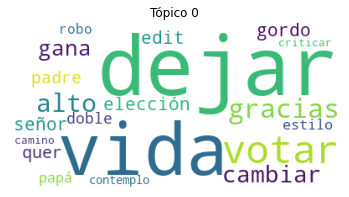

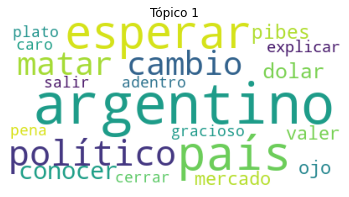

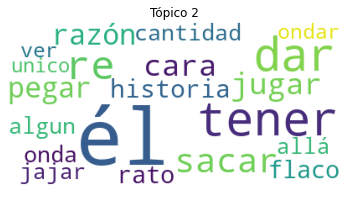

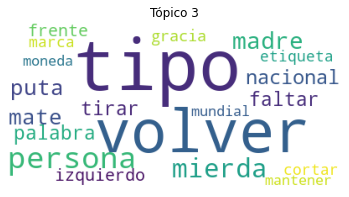

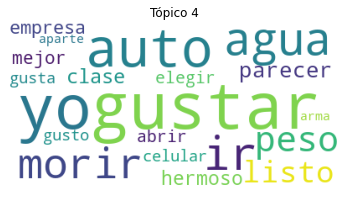

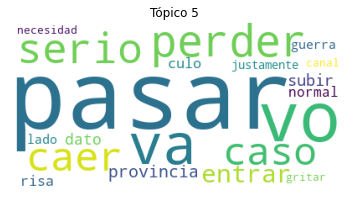

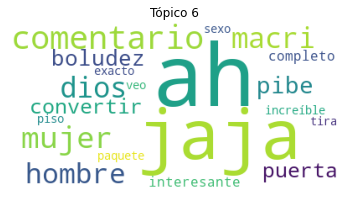

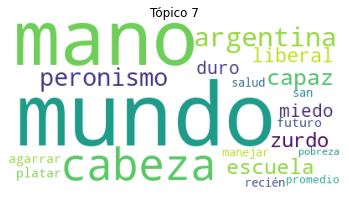

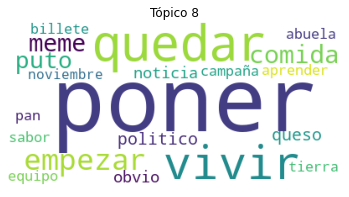

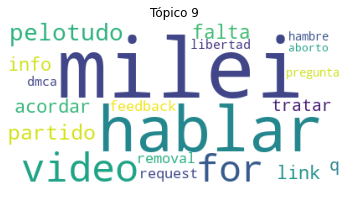

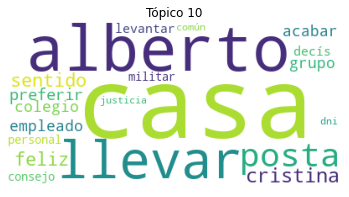

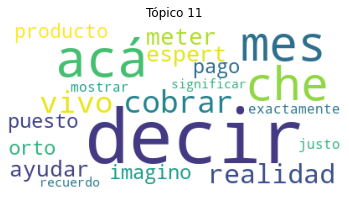

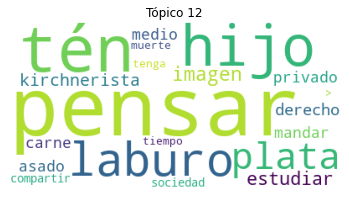

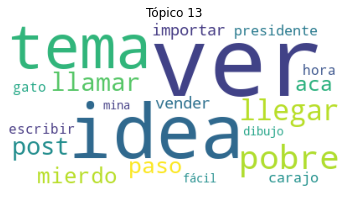

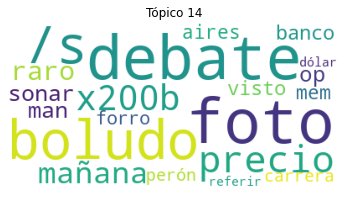

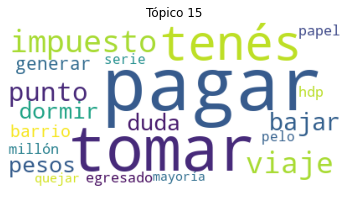

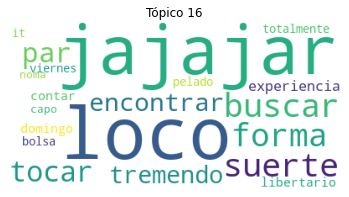

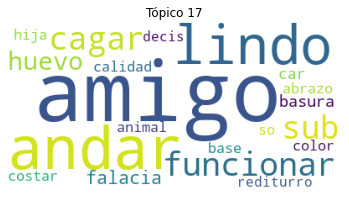

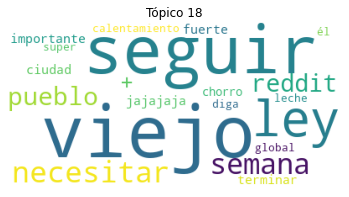

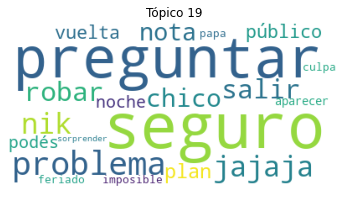

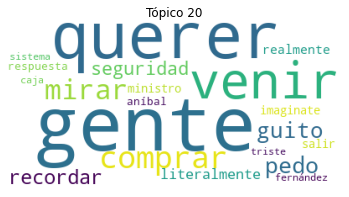

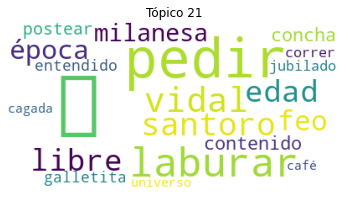

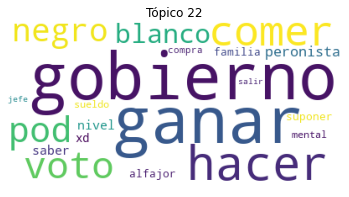

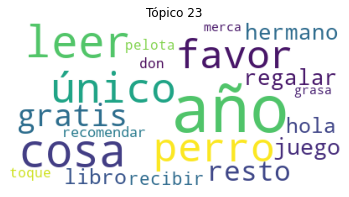

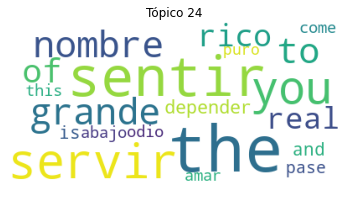

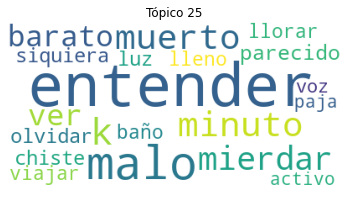

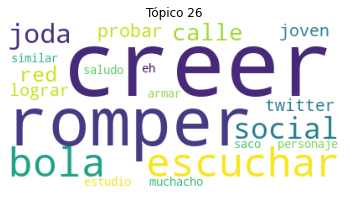

In [11]:
for index, topic in base_model.show_topics(num_topics=30, formatted=False, num_words= 30):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(base_model.show_topic(index, 20))))
    plt.axis("off")
    plt.title("Tópico " + str(index))
    plt.show()

In [12]:
reddit = pd.read_csv(TEXT_FILE_READ)

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # row = sorted(row, key=lambda x: (x[1]), reverse=True) # old line
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                #ent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4)]), ignore_index=True)
                #print(sent_topics_df)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    #sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution']

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, texts], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=base_model, corpus=corpus, texts=reddit)

In [13]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,index,Dominant_Topic,Perc_Contribution,Topic_Keywords,score,id,flair,comms_num,body,comment_parent_id,is_replay,body_preprocessing
0,0,3.0,0.1497,"tipo, volver, persona, mierda, madre, mate, pu...",1,hgw77qe,Política🏛️,0,"Iba a decir, bue si lo saco de su bolsillo... ...",q9imco,False,bue saco bolsillo recorder hdp mantener alcanz...
1,1,8.0,0.1152,"poner, quedar, vivir, empezar, comida, meme, p...",1,hgw7dci,Política🏛️,0,Se volvio un meme el bot del dolar?,hgw666m,True,volvio meme dolar
2,2,10.0,0.2160,"casa, alberto, llevar, posta, cristina, feliz,...",1,hgw69er,Humor:snoo_joy:,0,Este Esteban Lamothe estaba en la ficción de u...,q9i4uj,False,ester lamothe ficción villo acá comedia políti...
3,3,3.0,0.1895,"tipo, volver, persona, mierda, madre, mate, pu...",1,hgw6zvd,Meme💩,0,Eso porque son todos útos chupa bija.. Venga e...,hgw2528,True,úto chupa bijo venir ban nedflanducacion
4,4,21.0,0.1059,"⠀, pedir, laburar, vidal, santoro, libre, edad...",1,hgw24ns,Meme💩,0,mas verso burgués que Maximo no hay. Es la rep...,q9hut7,False,verso burgués maximo representación
5,5,24.0,0.1727,"the, sentir, servir, you, grande, nombre, to, ...",1,hgw38x8,Meme💩,0,Ayudar con comida? Na mejor unos afiches a tod...,q9hut7,False,ayudar comida na afich color
6,6,15.0,0.1263,"pagar, tomar, tenés, impuesto, viaje, punto, b...",1,hgw2rml,Meme💩,1,¿Por qué si es un cerdo tiene 6 patas?,q9hut7,False,cerdo pata
7,7,19.0,0.1247,"seguro, preguntar, problema, jajaja, nik, sali...",1,hgw3wei,Meme💩,0,"Mira, soy tan capitalista que por 15 mil pesos...",q9hut7,False,mira capitalisto pesos corrijo color
8,8,24.0,0.1855,"the, sentir, servir, you, grande, nombre, to, ...",1,hgw78bv,Meme💩,0,Swinetaur libertario de Darkest Perónia. Ruin ...,q9hut7,False,swinetaur libertario darkest perónia ruin come...
9,9,25.0,0.1864,"entender, malo, k, minuto, muerto, mierdar, ve...",1,hgw6rim,Meme💩,0,como no pueden contra elllll. lo ensucian vamo...,q9hut7,False,elllll ensuciar milie bastar k


In [14]:
df_dominant_topic.to_csv(TEXT_SAVE_FILE, index=False)